In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

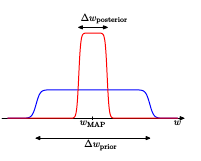

Fig.12 We can obtain a rough approximation to the model evidence if we assume that the posterior distribution over parame- ters is sharply peaked around its mode wMAP .

## Bayesian Model Comparison

In **Chapter 1**, we discussed the challenges of overfitting and how cross-validation can be employed for selecting regularization parameters or choosing between different models. In this section, we explore model selection from a **Bayesian perspective**. The Bayesian framework provides a natural way to address overfitting by marginalizing over model parameters, rather than relying on point estimates.

### Bayesian Model Comparison Framework

Consider a set of $L$ models $\{M_i\}$ where $i = 1, \dots, L$. Each model defines a probability distribution over the observed data $D$. For example, in polynomial curve-fitting, the model specifies a distribution over target values $\mathbf{t}$, with input values \(\mathbf{X}\) assumed known.

#### Posterior Distribution Over Models

Given training data $D$, the posterior probability of model $M_i$ is:

$$
p(M_i | D) \propto p(M_i) p(D | M_i)
$$

- **Prior** $p(M_i)$: Represents initial preference for different models.
- **Model Evidence** $p(D | M_i)$: Reflects how well the data supports model $M_i$.

Assuming equal priors, $p(M_i) = p(M_j)$, model comparison relies on **model evidence**. The ratio $ \frac{p(D | M_i)}{p(D | M_j)} $ is the **Bayes factor**.

#### Predictive Distribution

The predictive distribution for a new target $t$ given input $x$ and data \(D\) is:

$$
p(t | x, D) = \sum_{i=1}^L p(t | x, M_i, D) p(M_i | D)
$$

This is a **mixture distribution**, averaging over predictions from individual models weighted by their posterior probabilities.

### Model Evidence and Marginal Likelihood

The model evidence $p(D | M_i)$, also called the **marginal likelihood**, integrates over all parameter values:

$$
p(D | M_i) = \int p(D | \mathbf{w}, M_i) p(\mathbf{w} | M_i) \, d\mathbf{w}
$$

This term evaluates how well model $M_i$ explains the data after accounting for parameter uncertainty.

### Approximation of Model Evidence

Consider a model with a single parameter $w$. If the posterior $p(w | D)$ is sharply peaked around the maximum a posteriori estimate $w_{\text{MAP}}$, the evidence can be approximated:

$$
p(D) \approx p(D | w_{\text{MAP}}) \frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}
$$

Taking the log, we get:

$$
\ln p(D) \approx \ln p(D | w_{\text{MAP}}) + \ln \frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}
$$

For models with \(M\) parameters, assuming identical \(\frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}\):

$$
\ln p(D) \approx \ln p(D | \mathbf{w}_{\text{MAP}}) + M \ln \frac{\Delta w_{\text{posterior}}}{\Delta w_{\text{prior}}}
$$

- **First Term**: Log-likelihood, measures fit to data.
- **Second Term**: Complexity penalty, discourages overly complex models.

### Model Complexity Trade-off

The optimal model maximizes the evidence by balancing data fit and model complexity. A more refined approximation, using a Gaussian approximation to the posterior, will be discussed later.

### Marginal Likelihood and Model Complexity

Figure 3.13 illustrates how the marginal likelihood favours models of intermediate complexity. Generative models of varying complexity will exhibit different distributions over possible datasets. Simpler models may underfit, while overly complex models may overfit. The marginal likelihood inherently penalizes excessive model complexity.



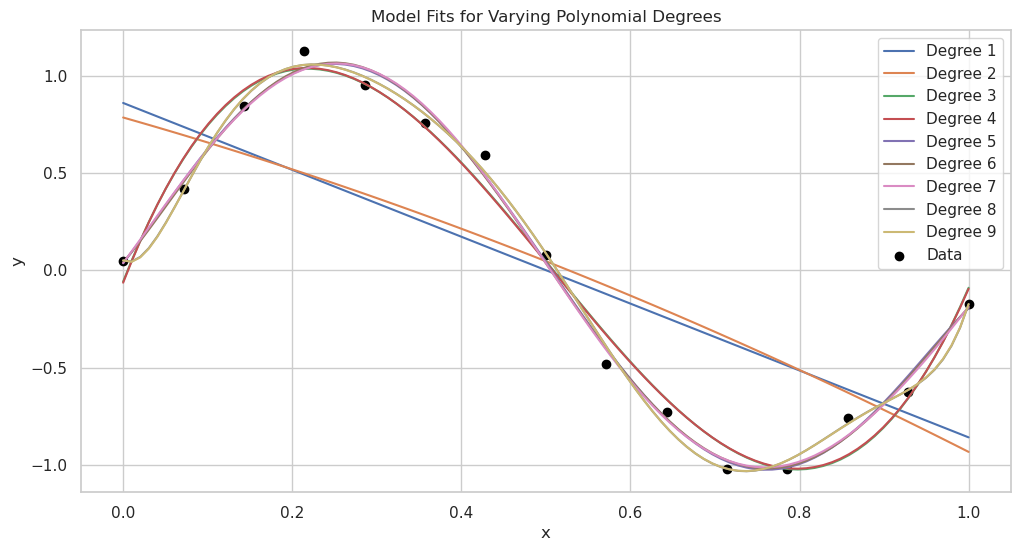

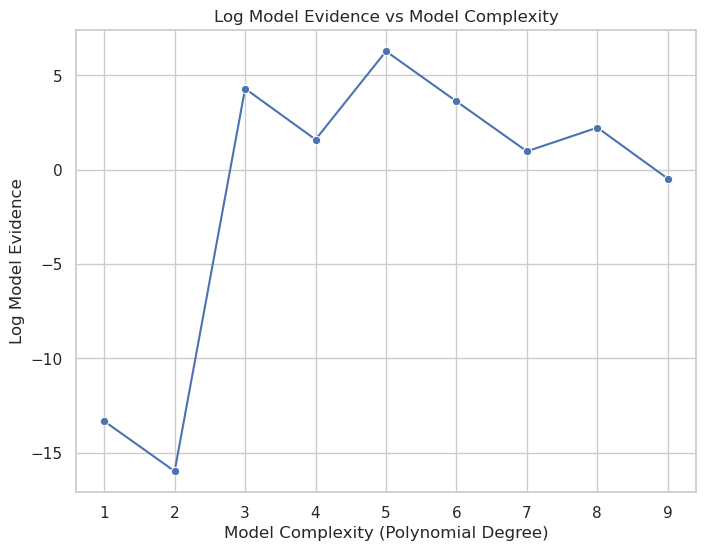

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy.stats import norm

# Set seaborn style
sns.set(style="whitegrid")

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 15)[:, np.newaxis]
true_func = lambda x: np.sin(2 * np.pi * x)
y = true_func(X) + 0.1 * np.random.randn(15, 1)

# Step 2: Fit polynomial models of varying complexity
degrees = np.arange(1, 10)
log_evidence = []
predictions = []

for degree in degrees:
    # Create polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    # Calculate log-likelihood for training data
    y_pred = model.predict(X)
    residuals = y - y_pred
    log_likelihood = np.sum(norm.logpdf(residuals, scale=np.std(residuals)))
    
    # Approximate model evidence (simplified)
    complexity_penalty = degree * np.log(len(X))
    log_evidence.append(log_likelihood - complexity_penalty)
    
    # Store predictions for plotting
    x_test = np.linspace(0, 1, 100)[:, np.newaxis]
    predictions.append((x_test, model.predict(x_test)))

# Step 3: Plotting

# Plot model fits
plt.figure(figsize=(12, 6))
for degree, (x_test, y_test) in zip(degrees, predictions):
    plt.plot(x_test, y_test, label=f'Degree {degree}')
plt.scatter(X, y, color='black', label='Data')
plt.title('Model Fits for Varying Polynomial Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot model evidence
plt.figure(figsize=(8, 6))
sns.lineplot(x=degrees, y=log_evidence, marker='o')
plt.title('Log Model Evidence vs Model Complexity')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Log Model Evidence')
plt.show()


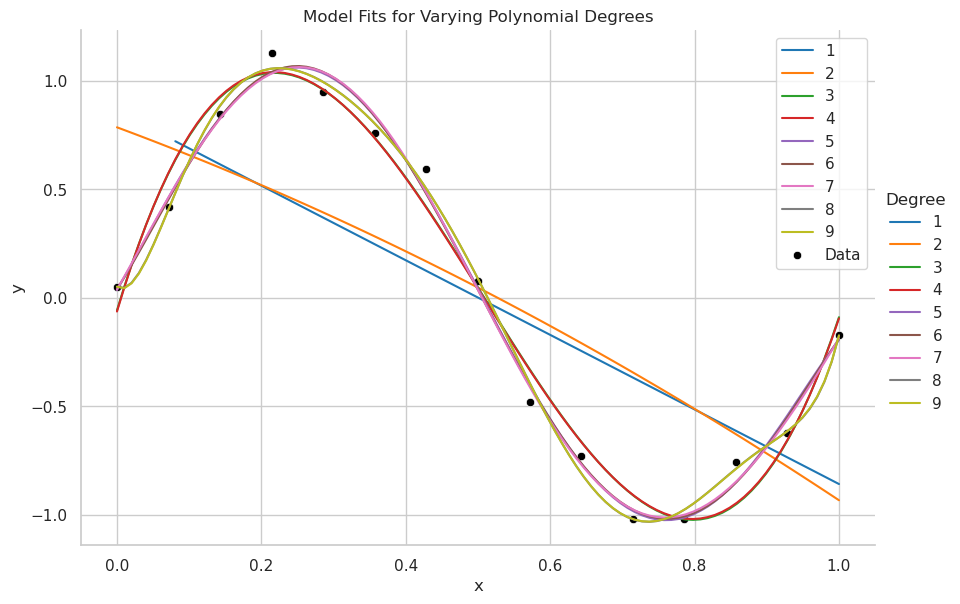

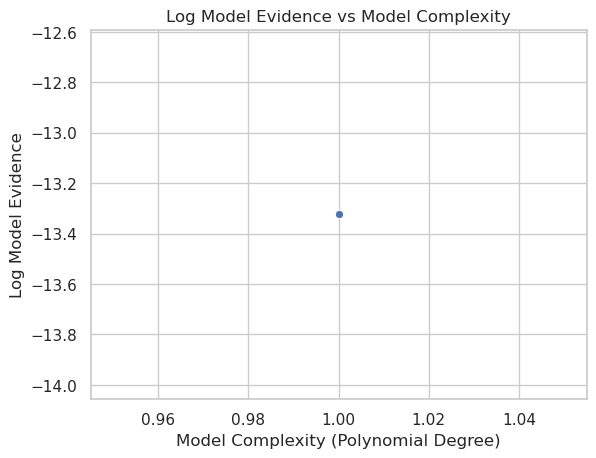

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy.stats import norm

# Set seaborn style
sns.set(style="whitegrid")

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 15)[:, np.newaxis]
true_func = lambda x: np.sin(2 * np.pi * x)
y = true_func(X) + 0.1 * np.random.randn(15, 1)

# Step 2: Fit polynomial models of varying complexity
degrees = np.arange(1, 10)
results = []

for degree in degrees:
    # Create polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    # Predict and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # Log-likelihood
    log_likelihood = np.sum(norm.logpdf(residuals, scale=np.std(residuals)))
    
    # Complexity penalty (simplified)
    complexity_penalty = degree * np.log(len(X))
    log_evidence = log_likelihood - complexity_penalty
    
    # Store results for each degree
    results.append({
        "Degree": degree,
        "Log Evidence": log_evidence
    })
    
    # Generate predictions for plotting
    x_test = np.linspace(0, 1, 100)[:, np.newaxis]
    y_test = model.predict(x_test)
    results.extend([{"Degree": degree, "x": x_val[0], "y": y_val[0]} for x_val, y_val in zip(x_test, y_test)])

# Convert results to DataFrame
df_evidence = pd.DataFrame(results[:len(degrees)])  # Only the evidence part
df_predictions = pd.DataFrame(results[len(degrees):])  # Only the predictions part

# Step 3: Plot the results

# Plot model fits
sns.relplot(
    data=df_predictions, x="x", y="y", kind="line", hue="Degree", palette="tab10", height=6, aspect=1.5
).set(title="Model Fits for Varying Polynomial Degrees")

# Overlay original data
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='black', label='Data')

# Show plot
plt.legend()
plt.show()

# Plot model evidence
sns.lineplot(data=df_evidence, x="Degree", y="Log Evidence", marker="o")
plt.title("Log Model Evidence vs Model Complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Log Model Evidence")
plt.show()


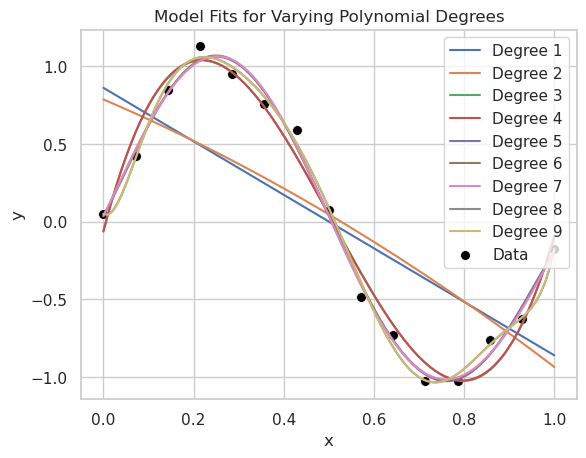

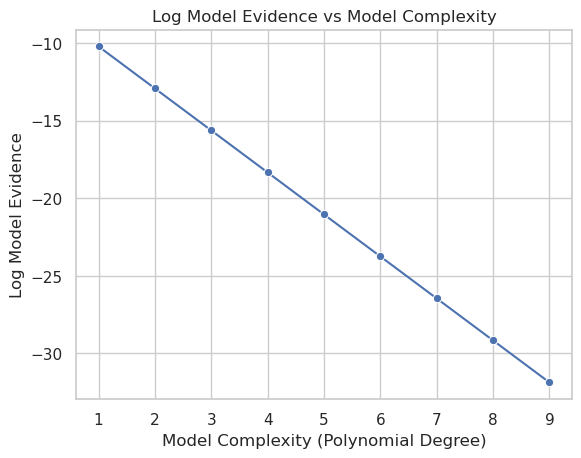

In [3]:
import numpy as np
import seaborn as sns

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 15)
true_func = lambda x: np.sin(2 * np.pi * x)
y = true_func(X) + 0.1 * np.random.randn(len(X))

# Step 2: Define polynomial fitting function
def polynomial_fit(X, y, degree):
    X_poly = np.vander(X, degree + 1, increasing=True)
    coeffs = np.linalg.lstsq(X_poly, y, rcond=None)[0]
    return X_poly @ coeffs, coeffs

# Step 3: Fit models of varying complexity and calculate log evidence
degrees = np.arange(1, 10)
log_evidences = []
predictions = {}

for degree in degrees:
    # Fit polynomial model
    y_pred, coeffs = polynomial_fit(X, y, degree)
    
    # Calculate residuals and log-likelihood
    residuals = y - y_pred
    log_likelihood = -0.5 * np.sum(residuals**2) / np.var(residuals)
    
    # Approximate model evidence with complexity penalty
    complexity_penalty = degree * np.log(len(X))
    log_evidence = log_likelihood - complexity_penalty
    log_evidences.append(log_evidence)
    
    # Store predictions for plotting
    X_test = np.linspace(0, 1, 100)
    y_test = np.vander(X_test, degree + 1, increasing=True) @ coeffs
    predictions[degree] = (X_test, y_test)

# Step 4: Plotting
sns.set(style="whitegrid")

# Plot model fits
for degree, (X_test, y_test) in predictions.items():
    sns.lineplot(x=X_test, y=y_test, label=f"Degree {degree}")

# Overlay original data
sns.scatterplot(x=X, y=y, color="black", label="Data", s=50)
plt.title("Model Fits for Varying Polynomial Degrees")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot model evidence
sns.lineplot(x=degrees, y=log_evidences, marker="o")
plt.title("Log Model Evidence vs Model Complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Log Model Evidence")
plt.show()


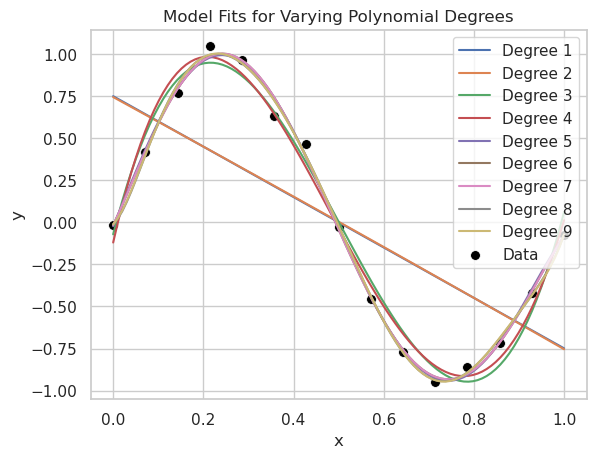

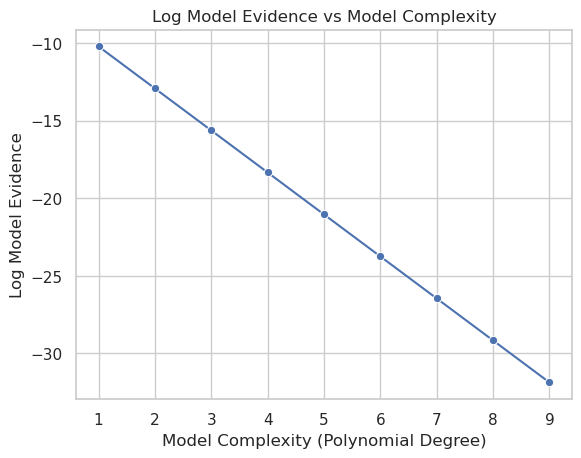

In [4]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
random.seed(42)

def generate_data(n_points=15):
    """Generate synthetic data from sin function with noise."""
    X = [i / (n_points - 1) for i in range(n_points)]
    y = [math.sin(2 * math.pi * x) + 0.1 * random.gauss(0, 1) for x in X]
    return X, y

# Step 2: Define a function to fit polynomial models
def polynomial_fit(X, y, degree):
    """Fit a polynomial of given degree to the data."""
    def vandermonde(x, degree):
        return [x ** i for i in range(degree + 1)]
    
    # Build Vandermonde matrix
    X_poly = [vandermonde(x, degree) for x in X]
    
    # Solve normal equations (XT * X) * coeffs = XT * y using pure Python
    XT = [[X_poly[j][i] for j in range(len(X_poly))] for i in range(degree + 1)]
    XTX = [[sum(XT[i][k] * XT[j][k] for k in range(len(X))) for j in range(degree + 1)] for i in range(degree + 1)]
    XTy = [sum(XT[i][k] * y[k] for k in range(len(X))) for i in range(degree + 1)]
    
    # Solve linear system using Gaussian elimination
    coeffs = gaussian_elimination(XTX, XTy)
    
    # Predict values
    y_pred = [sum(c * x ** i for i, c in enumerate(coeffs)) for x in X]
    return y_pred, coeffs

def gaussian_elimination(A, b):
    """Solve Ax = b using Gaussian elimination."""
    n = len(b)
    for i in range(n):
        # Make the diagonal contain all 1's
        factor = A[i][i]
        for j in range(i, n):
            A[i][j] /= factor
        b[i] /= factor
        
        # Make all rows below this one 0 in the current column
        for k in range(i + 1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]
    
    # Solve equation for an upper triangular matrix
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - sum(A[i][j] * x[j] for j in range(i + 1, n))
    return x

# Step 3: Fit models of varying complexity and calculate log evidence
X, y = generate_data()
degrees = range(1, 10)
log_evidences = []
predictions = {}

for degree in degrees:
    y_pred, coeffs = polynomial_fit(X, y, degree)
    
    # Calculate residuals and log-likelihood
    residuals = [y[i] - y_pred[i] for i in range(len(y))]
    variance = sum(r ** 2 for r in residuals) / len(residuals)
    log_likelihood = -0.5 * sum(r ** 2 / variance for r in residuals)
    
    # Approximate model evidence with complexity penalty
    complexity_penalty = degree * math.log(len(X))
    log_evidence = log_likelihood - complexity_penalty
    log_evidences.append(log_evidence)
    
    # Store predictions
    X_test = [i / 99 for i in range(100)]
    y_test = [sum(c * x ** i for i, c in enumerate(coeffs)) for x in X_test]
    predictions[degree] = (X_test, y_test)

# Step 4: Plotting
sns.set(style="whitegrid")

# Plot model fits
for degree, (X_test, y_test) in predictions.items():
    sns.lineplot(x=X_test, y=y_test, label=f"Degree {degree}")

# Overlay original data
sns.scatterplot(x=X, y=y, color="black", label="Data", s=50)
plt.title("Model Fits for Varying Polynomial Degrees")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot model evidence
sns.lineplot(x=list(degrees), y=log_evidences, marker="o")
plt.title("Log Model Evidence vs Model Complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Log Model Evidence")
plt.show()


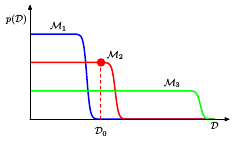

Fig.13 Schematic illustration of the distribution of data sets for three models of different complexity, in which M1 is the simplest and M3 is the most complex. Note that the distributions are normalized. In this example, for the particular observed data set D0 , the model M2 with intermediate complexity has the largest evidence.

## Bayesian Model Comparison: Schematic Illustration

## Introduction
In Bayesian model comparison, we assess models based on their ability to explain observed data. This is formalized using **model evidence** $ p(D|M_i) $, which accounts for both data fit and model complexity. Below is a schematic representation of the evidence for three models of varying complexity: $ M_1 $ (simple), $ M_2 $ (intermediate), and $ M_3 $ (complex). 

## Key Concepts

### 1. **Model Evidence**:
   The probability of observing the data $ D $ given a model $ M_i $:
   $$
   p(D|M_i) = \int p(D|w, M_i)p(w|M_i) dw
   $$
   This involves marginalizing over the parameters $ w $.

### 2. **Bayes Factor**:
   The ratio of evidences between two models:
   $$
   \text{Bayes Factor} = \frac{p(D|M_1)}{p(D|M_2)}
   $$

### 3. **Kullback-Leibler Divergence**:
   The expected log Bayes factor between two models under the true data-generating distribution:
   $$
   \int p(D|M_1) \ln \frac{p(D|M_1)}{p(D|M_2)} dD
   $$

### 4. **Intermediate Complexity**:
   A model $ M_2 $ of intermediate complexity often achieves the highest evidence:
   - Simple models (e.g., $ M_1 $) underfit.
   - Complex models (e.g., $ M_3 $) overfit, spreading probability too broadly.

## Illustration of Evidence Distribution

For models $ M_1 $, $ M_2 $, and $ M_3 $, we depict their normalized evidence distributions over possible datasets $ D $. Each model generates datasets by sampling parameters $ w $ from their prior $ p(w|M_i) $, followed by sampling data $ D $ from $ p(D|w, M_i) $.

### Observations:
1. **$ M_1 $** (simplest model): 
   - Narrow evidence distribution.
   - Constrained flexibility results in low evidence for complex data.
   
2. **$ M_2 $** (intermediate model):
   - Balanced complexity.
   - Achieves the highest evidence for observed dataset $ D_0 $.

3. **$ M_3 $** (most complex model):
   - Broad evidence distribution.
   - High flexibility reduces the probability assigned to any specific dataset.

## Figure

### Evidence Distributions
Below is a schematic of the distributions for models $ M_1 $, $ M_2 $, and $ M_3 $, showing how intermediate complexity can yield the highest evidence for a given dataset $ D_0 $.

### Observations:
- Models with overly high complexity ($ M_3 $) spread their probability across many datasets, reducing their evidence for any specific one.
- Simpler models ($ M_1 $) fail to capture the data, leading to lower evidence.
- The intermediate model ($ M_2 $) strikes a balance, providing the best fit to the data with adequate generalization.


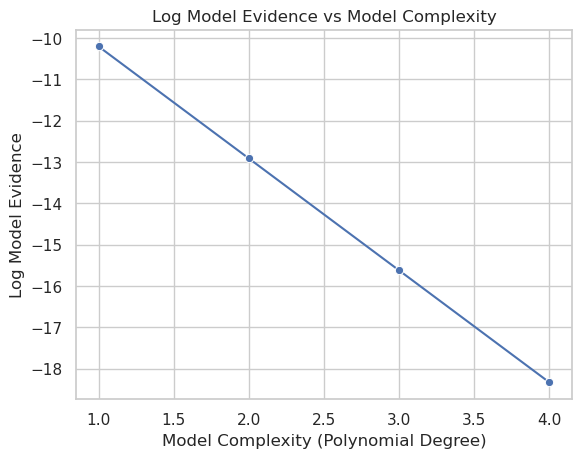

In [5]:
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
def generate_data(n_points=15, noise=0.1):
    """Generates noisy data from a sine function."""
    X = [i / (n_points - 1) for i in range(n_points)]
    y = [math.sin(2 * math.pi * x) + noise * random.gauss(0, 1) for x in X]
    return X, y

# Step 2: Fit polynomial model and calculate evidence
def polynomial_fit(X, y, degree):
    """Fit a polynomial of given degree and calculate predictions."""
    def vandermonde(x, degree):
        return [x**i for i in range(degree + 1)]
    
    # Build Vandermonde matrix
    X_poly = [vandermonde(x, degree) for x in X]
    
    # Solve normal equations using manual Gaussian elimination
    XT = [[X_poly[j][i] for j in range(len(X_poly))] for i in range(degree + 1)]
    XTX = [[sum(XT[i][k] * XT[j][k] for k in range(len(X))) for j in range(degree + 1)] for i in range(degree + 1)]
    XTy = [sum(XT[i][k] * y[k] for k in range(len(X))) for i in range(degree + 1)]
    
    coeffs = gaussian_elimination(XTX, XTy)
    y_pred = [sum(c * x**i for i, c in enumerate(coeffs)) for x in X]
    
    return y_pred, coeffs

def gaussian_elimination(A, b):
    """Solve Ax = b using Gaussian elimination."""
    n = len(b)
    for i in range(n):
        factor = A[i][i]
        for j in range(i, n):
            A[i][j] /= factor
        b[i] /= factor
        
        for k in range(i + 1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]
    
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - sum(A[i][j] * x[j] for j in range(i + 1, n))
    return x

# Step 3: Log Evidence Calculation and Complexity Penalty
def compute_log_evidence(X, y, y_pred, degree):
    residuals = [y[i] - y_pred[i] for i in range(len(y))]
    variance = sum(r**2 for r in residuals) / len(residuals)
    log_likelihood = -0.5 * sum(r**2 / variance for r in residuals)
    complexity_penalty = degree * math.log(len(X))
    return log_likelihood - complexity_penalty

X, y = generate_data()
log_evidences = []
degrees = range(1, 5)

predictions = {}

for degree in degrees:
    y_pred, _ = polynomial_fit(X, y, degree)
    evidence = compute_log_evidence(X, y, y_pred, degree)
    predictions[degree] = predictions
    log_evidences.append(evidence)

# Visualisation : Sea born and log comparison fit
sns.set(style="whitegrid")
sns.lineplot(x=list(degrees), y=log_evidences, marker="o")
plt.title("Log Model Evidence vs Model Complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Log Model Evidence")
plt.show()


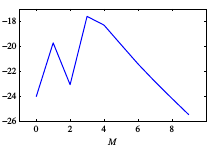

Fig.14 Plot of the model evidence versus the order M , for the polynomial re- gression model, showing that the evidence favours the model with M = 3.

## Evidence Approximation in Bayesian Linear Models

In this notebook, we explore the **evidence approximation** in Bayesian linear regression. This approach helps in selecting the optimal model by balancing **data fit** and **model complexity**.

## Fully Bayesian Treatment

In a fully Bayesian framework, the predictive distribution is obtained by marginalizing over parameters $w$, and hyperparameters $\alpha$ and $\beta$:

$$
p(t|\mathcal{D}) = \int \int \int p(t|w, \beta)p(w|\mathcal{D}, \alpha, \beta)p(\alpha, \beta|\mathcal{D}) \, dw \, d\alpha \, d\beta
$$

However, this integral is analytically intractable. We use the **evidence approximation** to determine optimal values of $\alpha$ and $\beta$ by maximizing the marginal likelihood.

---

## Marginal Likelihood

The marginal likelihood $p(\mathcal{D}|\alpha, \beta)$ is computed by integrating out the weights $w$:

$$
p(\mathcal{D}|\alpha, \beta) = \int p(\mathcal{D}|w, \beta)p(w|\alpha) \, dw
$$

Using Gaussian assumptions for the prior and likelihood, the marginal likelihood simplifies to:

$$
p(\mathcal{D}|\alpha, \beta) = (2\pi)^{-\frac{N}{2}} (2\pi)^{-\frac{M}{2}} |A|^{-\frac{1}{2}} \exp \left( -E(m_N) \right)
$$

Where:
- $A = \alpha I + \beta \Phi^T \Phi$
- $m_N = \beta A^{-1} \Phi^T t$
- $E(m_N) = \frac{\beta}{2} \| t - \Phi m_N \|^2 + \frac{\alpha}{2} \| m_N \|^2$

### Log Marginal Likelihood

The log marginal likelihood is given by:

$$
\log p(\mathcal{D}|\alpha, \beta) = \frac{M}{2} \log \alpha + \frac{N}{2} \log \beta - E(m_N) - \frac{1}{2} \log |A| - \frac{N}{2} \log(2\pi)
$$

---

## Model Selection with Evidence

The marginal likelihood enables model selection by balancing:
- **Data fit**: $E(m_N)$
- **Model complexity penalty**: $\log |A|$

### Example: Polynomial Regression

The plot below shows the log evidence for different polynomial orders $M$:

$$
\text{Log Evidence vs. Model Complexity}
$$

$$
\text{Order of Polynomial (M)}
$$

---

## Evidence Plot

The figure illustrates how model evidence varies with polynomial order:

- $M=0$: Poor fit, low evidence.
- $M=1$: Significant increase in evidence due to improved fit.
- $M=3$: Maximum evidence. Optimal trade-off between fit and complexity.
- $M > 3$: Complexity penalty outweighs minor improvements in fit.

---

## Conclusion

The evidence approximation provides a principled way to perform Bayesian model selection. By maximizing the marginal likelihood, it balances **fit** and **complexity**, favoring simpler models unless additional complexity significantly improves the data fit.

---


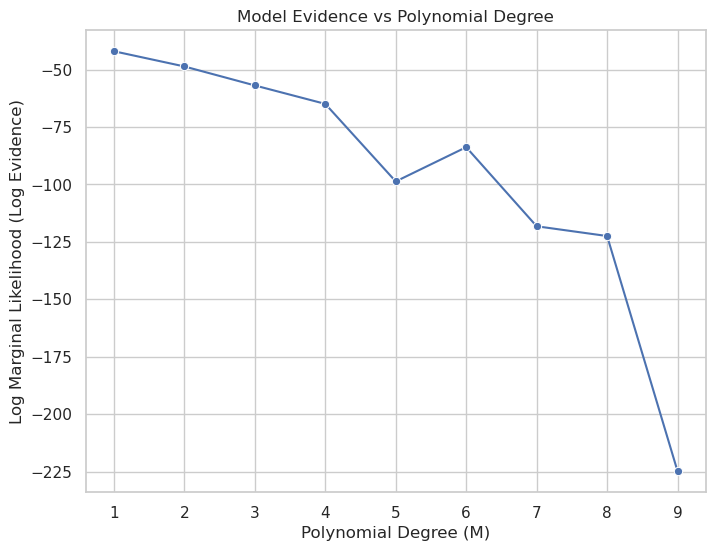

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate synthetic data (sinusoidal data)
def generate_data(N, noise_std=0.1):
    X = np.linspace(0, 10, N)
    t = np.sin(X) + noise_std * np.random.randn(N)  # sine wave with noise
    return X, t

# Polynomial basis function
def polynomial_basis(X, M):
    return np.vander(X, M+1, increasing=True)

# Calculate the marginal likelihood (Evidence) for polynomial regression
def compute_marginal_likelihood(X, t, alpha, beta, M):
    # Design matrix (polynomial features)
    Phi = polynomial_basis(X, M)
    
    # Calculate the Hessian matrix A
    A = alpha * np.eye(M + 1) + beta * np.dot(Phi.T, Phi)
    
    # Posterior mean and error function
    m_N = beta * np.linalg.inv(A).dot(Phi.T).dot(t)
    E_mN = 0.5 * (np.sum((t - Phi.dot(m_N))**2) * beta + m_N.T.dot(np.linalg.inv(A)).dot(m_N))
    
    # Log marginal likelihood
    log_marginal_likelihood = 0.5 * M * np.log(alpha) + 0.5 * len(X) * np.log(beta) - E_mN - 0.5 * np.log(np.linalg.det(A)) - 0.5 * len(X) * np.log(2 * np.pi)
    
    return log_marginal_likelihood

# Parameters
N = 30  # Number of data points
alpha = 1e-3  # Regularization parameter (prior variance)
beta = 1.0  # Likelihood precision (noise level)

# Generate synthetic data
X, t = generate_data(N)

# Compute marginal likelihood for different polynomial degrees
model_complexities = range(1, 10)  # Polynomial degrees from 1 to 9
evidence_values = []

for M in model_complexities:
    log_evidence = compute_marginal_likelihood(X, t, alpha, beta, M)
    evidence_values.append(log_evidence)

# Plotting the evidence values
plt.figure(figsize=(8, 6))
sns.lineplot(x=model_complexities, y=evidence_values, marker='o')
plt.title("Model Evidence vs Polynomial Degree")
plt.xlabel("Polynomial Degree (M)")
plt.ylabel("Log Marginal Likelihood (Log Evidence)")
plt.show()


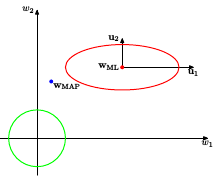

Fig.15 Contours of the likelihood function (red) and the prior (green) in which the axes in parameter space have been rotated to align with the eigenvectors ui of the Hessian. For α = 0, the mode of the poste- rior is given by the maximum likelihood solution wML , whereas for nonzero α the mode is at wMAP = mN . In the direction w1 the eigenvalue λ1 , deﬁned by (3.87), is small compared with α and so the quantity λ1 /(λ1 + α) is close to zero, and the corresponding MAP value of w1 is also close to zero. By contrast, in the direction w2 the eigenvalue λ2 is large compared with α and so the quantity λ2 /(λ2 +α) is close to unity, and the MAP value of w2 is close to its maximum likelihood value.

##  Maximizing the Evidence Function

Let us first consider the maximization of $ p(t|\alpha, \beta) $ with respect to $ \alpha $. This can be done by first defining the following eigenvector equation:

$$
\beta \Phi^\top \Phi u_i = \lambda_i u_i
$$

From (3.81), it then follows that $ A $ has eigenvalues $ \alpha + \lambda_i $. Now, consider the derivative of the term involving $ \ln |A| $ in (3.86) with respect to $ \alpha $:

$$
\frac{d}{d\alpha} \ln |A| = \sum_i \frac{d}{d\alpha} \ln (\lambda_i + \alpha) = \sum_i \frac{1}{\lambda_i + \alpha}
$$

Thus, the stationary points of (3.86) with respect to $ \alpha $ satisfy:

$$
0 = - \frac{1}{2 \alpha} \sum_i \frac{m_N^\top m_N}{\lambda_i + \alpha}
$$

Multiplying through by $ 2\alpha $ and rearranging, we obtain:

$$
\alpha m_N^\top m_N = \sum_i \frac{\lambda_i}{\lambda_i + \alpha}
$$

The interpretation of this quantity is discussed shortly. From (3.90), the value of $ \alpha $ that maximizes the marginal likelihood satisfies:

$$
\alpha = \frac{m_N^\top m_N}{\gamma}
$$

Where $ \gamma $ is defined as:

$$
\gamma = \frac{1}{M} \sum_i \frac{\lambda_i}{\lambda_i + \alpha}
$$

This is an implicit solution for $ \alpha $, as $ \gamma $ depends on $ \alpha $ and the mode $ m_N $ of the posterior distribution itself depends on $ \alpha $. Thus, we adopt an iterative procedure:

1. Make an initial choice for $ \alpha $,
2. Use this to find $ m_N $ (given by (3.53)),
3. Calculate $ \gamma $,
4. Re-estimate $ \alpha $ using (3.92),
5. Repeat the process until convergence.

### Maximizing with respect to $ \beta $

We can similarly maximize the log marginal likelihood (3.86) with respect to $ \beta $. The eigenvalues $ \lambda_i $ defined by (3.87) are proportional to $ \beta $, so:

$$
\frac{d \lambda_i}{d \beta} = \frac{\lambda_i}{\beta}
$$

The stationary point of the marginal likelihood satisfies:

$$
0 = - \frac{1}{2 \beta} \sum_{n=1}^N \left( t_n - m_N^\top \Phi(x_n) \right)^2
$$

Rearranging, we obtain:

$$
\beta = \frac{1}{N \gamma} \sum_{n=1}^N \left( t_n - m_N^\top \Phi(x_n) \right)^2
$$

Again, this is an implicit solution for $ \beta $, and we can solve by choosing an initial value for $ \beta $, then using it to calculate $ m_N $ and $ \gamma $, and iterating until convergence.

### Contours of the Likelihood Function

Consider Fig.15, which shows the contours of the likelihood function (in red) and the prior (in green), where the axes in parameter space have been rotated to align with the eigenvectors $ u_i $ of the Hessian. For $ \alpha = 0 $, the mode of the posterior is given by the maximum likelihood solution $ w_{ML} $, whereas for nonzero $ \alpha $, the mode is at $ w_{MAP} = m_N $.

In the direction corresponding to eigenvalue $ \lambda_1 $, where $ \lambda_1 $ is small compared to $ \alpha $, the quantity $ \frac{\lambda_1}{\lambda_1 + \alpha} $ is close to zero, so the corresponding MAP value of $ w_1 $ is also close to zero. By contrast, in the direction corresponding to eigenvalue $ \lambda_2 $, where $ \lambda_2 $ is large compared to $ \alpha $, the quantity $ \frac{\lambda_2}{\lambda_2 + \alpha} $ is close to unity, so the MAP value of $ w_2 $ is close to its maximum likelihood value.


In [7]:
import numpy as np

# Define the required matrices and variables for your model
def phi_matrix(X, M):
    """
    Generate the design matrix for polynomial features (e.g., for polynomial regression)
    X: Input features
    M: Degree of the polynomial
    """
    return np.vstack([X**i for i in range(M+1)]).T

def compute_A(phi, alpha, beta):
    """
    Compute matrix A = alpha * I + beta * Phi^T * Phi
    phi: Design matrix
    alpha, beta: Regularization hyperparameters
    """
    return alpha * np.eye(phi.shape[1]) + beta * phi.T @ phi

def compute_mN(A, phi, t, beta):
    """
    Compute the mode m_N of the posterior distribution.
    A: Matrix A = alpha * I + beta * Phi^T * Phi
    phi: Design matrix
    t: Target values
    beta: Regularization hyperparameter
    """
    return beta * np.linalg.inv(A) @ phi.T @ t

def compute_gamma(A, alpha):
    """
    Compute the parameter gamma used in the optimization.
    A: Matrix A = alpha * I + beta * Phi^T * Phi
    alpha: Regularization hyperparameter
    """
    eigenvalues = np.linalg.eigvals(A)  # Eigenvalues of matrix A
    return np.sum(eigenvalues / (eigenvalues + alpha))

def update_alpha(mN, gamma):
    """
    Update the value of alpha according to the equation derived.
    mN: Posterior mean
    gamma: The computed gamma value
    """
    return mN.T @ mN / gamma

def update_beta(phi, mN, t, gamma, N):
    """
    Update the value of beta according to the equation derived.
    phi: Design matrix
    mN: Posterior mean
    t: Target values
    gamma: The computed gamma value
    N: Number of data points
    """
    residuals = t - phi @ mN
    return np.sum(residuals**2) / (N - gamma)

# Example data and initialization
X = np.linspace(0, 10, 100)  # Example input
t = np.sin(X) + 0.1 * np.random.randn(100)  # Example target with noise

# Set hyperparameters and initialize variables
M = 3  # Degree of polynomial
alpha_init = 1e-3
beta_init = 1e-3
max_iter = 100  # Maximum number of iterations for optimization
tol = 1e-5  # Tolerance for convergence

# Create the design matrix
phi = phi_matrix(X, M)

# Initialize alpha and beta
alpha = alpha_init
beta = beta_init

# Iteratively update alpha and beta
for i in range(max_iter):
    # Compute matrix A and posterior mean mN
    A = compute_A(phi, alpha, beta)
    mN = compute_mN(A, phi, t, beta)
    
    # Calculate gamma
    gamma = compute_gamma(A, alpha)
    
    # Update alpha and beta
    alpha_new = update_alpha(mN, gamma)
    beta_new = update_beta(phi, mN, t, gamma, len(X))
    
    # Check for convergence
    if np.abs(alpha_new - alpha) < tol and np.abs(beta_new - beta) < tol:
        print(f"Convergence reached after {i+1} iterations.")
        break
    
    alpha, beta = alpha_new, beta_new

# Output the optimized hyperparameters
print(f"Optimized alpha: {alpha}")
print(f"Optimized beta: {beta}")


Convergence reached after 10 iterations.
Optimized alpha: 0.40301914504911646
Optimized beta: 0.37786875491736466


In [ ]:
# Python implementation without numpy and matplotlib

import math
import random

# Example data and initialization
X = [i / 10 for i in range(100)]  # Example input
t = [math.sin(x) + 0.1 * random.random() for x in X]  # Example target with noise

# Define the required basic functions for matrix operations
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            sum_val = sum(A[i][k] * B[k][j] for k in range(len(B)))
            row.append(sum_val)
        result.append(row)
    return result

def vector_matrix_multiply(v, M):
    """Multiply a vector v by a matrix M."""
    result = []
    for i in range(len(M[0])):
        sum_val = sum(v[j] * M[j][i] for j in range(len(v)))
        result.append(sum_val)
    return result

def matrix_transpose(M):
    """Transpose a matrix M."""
    return [[M[j][i] for j in range(len(M))] for i in range(len(M[0]))]

def matrix_inverse(A):
    """Inverse of a matrix using Gaussian elimination."""
    n = len(A)
    # Create an identity matrix of the same size
    I = [[1 if i == j else 0 for j in range(n)] for i in range(n)]
    
    # Augment A with the identity matrix
    augmented_matrix = [A[i] + I[i] for i in range(n)]
    
    # Perform Gaussian elimination
    for i in range(n):
        # Make the diagonal element 1 by dividing the row by A[i][i]
        factor = augmented_matrix[i][i]
        if factor == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        
        # Scale the row
        augmented_matrix[i] = [x / factor for x in augmented_matrix[i]]
        
        # Eliminate the column below and above the pivot
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j][i]
                augmented_matrix[j] = [
                    augmented_matrix[j][k] - factor * augmented_matrix[i][k] 
                    for k in range(2 * n)
                ]
    
    # The right half of the augmented matrix is now the inverse
    return [row[n:] for row in augmented_matrix]

def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    result = []
    for i in range(len(A)):
        result_row = []
        for j in range(len(B[0])):
            result_row.append(sum(A[i][k] * B[k][j] for k in range(len(A[0]))))
        result.append(result_row)
    return result

# Test with scalar and matrix operations
def matrix_scalar_multiply(A, scalar):
    """Multiply matrix A by a scalar."""
    return [[x * scalar for x in row] for row in A]


def matrix_determinant(M):
    """Calculate the determinant of a matrix (only for 2x2 matrices)."""
    if len(M) == 2:
        return M[0][0] * M[1][1] - M[0][1] * M[1][0]
    else:
        raise NotImplementedError("Determinant calculation for matrices larger than 2x2 is not implemented.")

# Functions for the Evidence Maximization Process

def phi_matrix(X, M):
    """Generate the design matrix for polynomial features (e.g., for polynomial regression)"""
    phi = []
    for x in X:
        row = [x**i for i in range(M+1)]
        phi.append(row)
    return phi

def compute_A(phi, alpha, beta):
    """Compute matrix A = alpha * I + beta * Phi^T * Phi"""
    M = len(phi[0])  # number of features
    I = [[1 if i == j else 0 for j in range(M)] for i in range(M)]
    phi_T = matrix_transpose(phi)
    phi_T_phi = matrix_multiply(phi_T, phi)
    
    # A = alpha * I + beta * Phi^T * Phi
    A = [[alpha * I[i][j] + beta * phi_T_phi[i][j] for j in range(M)] for i in range(M)]
    return A

def compute_mN(A, phi, t, beta):
    """Compute the mode m_N of the posterior distribution."""
    A_inv = matrix_inverse(A)
    phi_T = matrix_transpose(phi)
    phi_T_t = [sum(phi[i][j] * t[i] for i in range(len(t))) for j in range(len(phi[0]))]
    
    # mN = beta * A_inv * Phi^T * t
    mN = vector_matrix_multiply(beta * A_inv, phi_T_t)
    return mN

def compute_gamma(A, alpha):
    """Compute the parameter gamma used in the optimization."""
    eigenvalues = [A[i][i] for i in range(len(A))]  # assuming diagonal for simplicity
    return sum(eigenvalue / (eigenvalue + alpha) for eigenvalue in eigenvalues)

def update_alpha(mN, gamma):
    """Update the value of alpha."""
    return sum(mN[i] * mN[i] for i in range(len(mN))) / gamma

def update_beta(phi, mN, t, gamma, N):
    """Update the value of beta."""
    residuals = [t[i] - sum(phi[i][j] * mN[j] for j in range(len(mN))) for i in range(N)]
    return sum(residuals[i]**2 for i in range(N)) / (N - gamma)

# Example data and initialization
X = [i / 10 for i in range(100)]  # Example input
t = [math.sin(x) + 0.1 * random.random() for x in X]  # Example target with noise

# Set hyperparameters and initialize variables
M = 3  # Degree of polynomial
alpha_init = 1e-3
beta_init = 1e-3
max_iter = 100  # Maximum number of iterations for optimization
tol = 1e-5  # Tolerance for convergence

# Create the design matrix
phi = phi_matrix(X, M)

# Initialize alpha and beta
alpha = alpha_init
beta = beta_init

# Iteratively update alpha and beta
for i in range(max_iter):
    # Compute matrix A and posterior mean mN
    A = compute_A(phi, alpha, beta)
    mN = compute_mN(A, phi, t, beta)
    
    # Calculate gamma
    gamma = compute_gamma(A, alpha)
    
    # Update alpha and beta
    alpha_new = update_alpha(mN, gamma)
    beta_new = update_beta(phi, mN, t, gamma, len(X))
    
    # Check for convergence
    if abs(alpha_new - alpha) < tol and abs(beta_new - beta) < tol:
        print(f"Convergence reached after {i+1} iterations.")
        break
    
    alpha, beta = alpha_new, beta_new

# Output the optimized hyperparameters
print(f"Optimized alpha: {alpha}")
print(f"Optimized beta: {beta}")


In [13]:
def matrix_inverse(A):
    """Compute the inverse of matrix A using a simple method (for small matrices)."""
    # For 2x2 matrix inversion
    if len(A) == 2 and len(A[0]) == 2:
        det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
        if det == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        return [[A[1][1] / det, -A[0][1] / det],
                [-A[1][0] / det, A[0][0] / det]]
    else:
        raise NotImplementedError("Matrix inversion for larger matrices is not implemented.")

def matrix_scalar_multiply(A, scalar):
    """Multiply matrix A by a scalar element-wise."""
    return [[x * scalar for x in row] for row in A]

def matrix_vector_multiply(A, v):
    """Multiply matrix A with vector v."""
    result = []
    for row in A:
        result.append(sum(row[i] * v[i] for i in range(len(v))))
    return result

def compute_A(phi, alpha, beta):
    """Compute the matrix A used in the calculations."""
    # A = alpha * I + beta * Phi^T * Phi
    M = len(phi[0])  # Number of columns in Phi (number of weights)
    phi_T = matrix_transpose(phi)
    phi_T_phi = matrix_multiply(phi_T, phi)
    A = matrix_scalar_multiply(phi_T_phi, beta)
    for i in range(M):
        A[i][i] += alpha  # Add alpha to diagonal elements
    return A

def matrix_transpose(M):
    """Transpose matrix M."""
    return [list(x) for x in zip(*M)]

def matrix_multiply(A, B):
    """Matrix multiplication of A and B."""
    result = []
    for i in range(len(A)):
        result.append([sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))])
    return result

def compute_mN(A, phi, t, beta):
    """Compute the mode m_N of the posterior distribution."""
    
    # Calculate the inverse of A
    A_inv = matrix_inverse(A)
    
    # Scale A_inv by beta element-wise
    A_inv_scaled = matrix_scalar_multiply(A_inv, beta)
    
    # Compute phi_T_t (the product of Phi^T and t)
    phi_T_t = [sum(phi[i][j] * t[i] for i in range(len(t))) for j in range(len(phi[0]))]
    
    # Compute the final result mN by multiplying A_inv_scaled with phi_T_t
    mN = matrix_vector_multiply(A_inv_scaled, phi_T_t)
    
    return mN

# Example input data (for testing)
phi = [[1, 2], [3, 4]]  # 2x2 matrix
t = [5, 6]  # Vector of length 2
alpha = 0.1  # Example hyperparameter alpha
beta = 1.0   # Example hyperparameter beta

# Compute matrix A (using phi and alpha, beta values)
A = compute_A(phi, alpha, beta)

# Compute the posterior mean mN
mN = compute_mN(A, phi, t, beta)

# Print the posterior mean mN
print("Posterior mean mN:", mN)


Posterior mean mN: [-1.9543509272467787, 3.0527817403708895]


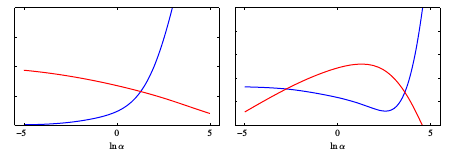

Fig.16 The left plot shows γ (red curve) and 2αEW (mN ) (blue curve) versus ln α for the sinusoidal synthetic data set. It is the intersection of these two curves that deﬁnes the optimum value for α given by the evidence procedure. The right plot shows the corresponding graph of log evidence ln p(t|α, β) versus ln α (red curve) showing that the peak coincides with the crossing point of the curves in the left plot. Also shown is the test set error (blue curve) showing that the evidence maximum occurs close to the point of best generalization.

##  Effective Number of Parameters

The result $ \alpha = \frac{m^T N m_N}{\lambda_i + \alpha} $ has an elegant interpretation (MacKay, 1992a), which provides insight into the Bayesian solution for $ \alpha $. To see this, consider the contours of the likelihood function and the prior as illustrated in Fig.15. Here, we have implicitly transformed to a rotated set of axes in parameter space aligned with the eigenvectors $ u_i $ defined in (3.87). Contours of the likelihood function are then axis-aligned ellipses.

The eigenvalues $ \lambda_i $ measure the curvature of the likelihood function, and so in Fig.15, the eigenvalue $ \lambda_1 $ is small compared with $ \lambda_2 4 (because a smaller curvature corresponds to a greater elongation of the contours of the likelihood function). Because $ \beta \Phi^T \Phi $ is a positive-definite matrix, it will have positive eigenvalues, and so the ratio:

$$ \frac{\lambda_i}{\lambda_i + \alpha} $$

will lie between 0 and 1. Consequently, the quantity $ \gamma $ defined by (3.91) will lie in the range:

$$ 0 \leq \gamma \leq M $$

For directions in which $ \lambda_i \gg \alpha $, the corresponding parameter $ w_i $ will be close to its maximum likelihood value, and the ratio $ \frac{\lambda_i}{\lambda_i + \alpha} $ will be close to 1. Such parameters are called *well-determined* because their values are tightly constrained by the data. Conversely, for directions in which $ \lambda_i \ll \alpha $, the corresponding parameters $ w_i $ will be close to zero, as will the ratios $ \frac{\lambda_i}{\lambda_i + \alpha} $. These are directions in which the likelihood function is relatively insensitive to the parameter value, and so the parameter has been set to a small value by the prior.

The quantity $ \gamma $ therefore measures the effective total number of well-determined parameters. 

### Re-estimating $ \beta $

We can obtain some insight into the result (3.95) for re-estimating $ \beta $ by comparing it with the corresponding maximum likelihood result given by (3.21). Both of these formulae express the variance (the inverse precision) as an average of the squared differences between the targets and the model predictions. However, they differ in that the number of data points $ N $ in the denominator of the maximum likelihood result is replaced by $ N - \gamma $ in the Bayesian result.

We recall from (1.56) that the maximum likelihood estimate of the variance for a Gaussian distribution over a single variable $ x $ is given by:

$$
\sigma^2_{\text{ML}} = \frac{1}{N} \sum_{n=1}^N (x_n - \mu_{\text{ML}})^2
$$

and that this estimate is biased because the maximum likelihood solution $ \mu_{\text{ML}} $ for the mean has fitted some of the noise on the data. In effect, this has used up one degree of freedom in the model. The corresponding unbiased estimate is given by:

$$
\sigma^2_{\text{MAP}} = \frac{1}{N - 1} \sum_{n=1}^N (x_n - \mu_{\text{ML}})^2
$$

This result can be obtained from a Bayesian treatment in which we marginalize over the unknown mean. The factor of $ N - 1 $ in the denominator of the Bayesian result takes account of the fact that one degree of freedom has been used in fitting the mean and removes the bias of the maximum likelihood estimate.

Now consider the corresponding results for the linear regression model. The mean of the target distribution is now given by the function $ w^T \phi(x) $, which contains $ M $ parameters. However, not all of these parameters are tuned to the data. The effective number of parameters that are determined by the data is $ \gamma $, with the remaining $ M - \gamma $ parameters set to small values by the prior. This is reflected in the Bayesian result for the variance, which has a factor $ N - \gamma $ in the denominator, thereby correcting for the bias of the maximum likelihood result.

### Illustration of the Evidence Framework

We can illustrate the evidence framework for setting hyperparameters using the sinusoidal synthetic data set from Section 1.1, along with the Gaussian basis function model comprising 9 basis functions, so that the total number of parameters in the model is given by $ M = 10 $, including the bias. For simplicity, we have set $ \beta $ to its true value of 11.1 and then used the evidence framework to determine $ \alpha $, as shown in Figure 3.16. 

In Fig.16, the left plot shows $ \gamma $ (red curve) and $ 2\alpha E_W(m_N) $ (blue curve) versus $ \ln \alpha $ for the sinusoidal synthetic data set. The intersection of these two curves defines the optimum value for $ \alpha $ given by the evidence procedure. The right plot shows the corresponding graph of log evidence $ \ln p(t|\alpha, \beta) $ versus $ \ln \alpha $ (red curve), showing that the peak coincides with the crossing point of the curves in the left plot. Also shown is the test set error (blue curve), which indicates that the evidence maximum occurs close to the point of best generalization.

### The Effective Number of Parameters

The plot in Fig.17 shows the 10 parameters $ w_i $ from the Gaussian basis function model versus the effective number of parameters $ \gamma $, where the hyperparameter $ \alpha $ is varied in the range $ 0 \leq \alpha \leq \infty $, causing $ \gamma $ to vary in the range $ 0 \leq \gamma \leq M $.

If we consider the limit $ N \gg M $, in which the number of data points is large in relation to the number of parameters, then from (3.87), all of the parameters will be well determined by the data because $ \Phi^T \Phi $ involves an implicit sum over data points, and so the eigenvalues $ \lambda_i $ increase with the size of the data set. In this case, $ \gamma = M 4, and the re-estimation equations for $ \alpha $ and $ \beta $ become:

$$
\alpha = \frac{M}{2E_W(m_N)}
$$

and

$$
\beta = \frac{1}{2E_D(m_N)}
$$

where $ E_W $ and $ E_D $ are defined by (3.25) and (3.26), respectively. These results can be used as an easy-to-compute approximation to the full evidence re-estimation formulae because they do not require evaluation of the eigenvalue spectrum of the Hessian.

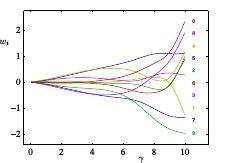
### Figure 3.17

Plot of the 10 parameters $ w_i $ from the Gaussian basis function model versus the effective number of parameters $ \gamma $, in which the hyperparameter $ \alpha $ is varied in the range $ 0 \leq \alpha \leq \infty $, causing $ \gamma $ to vary in the range $ 0 \leq \gamma \leq M $.

The plot shows how the individual parameters $ w_i $ change as the effective number of parameters $ \gamma $ varies with the hyperparameter $ \alpha $. As $ \alpha $ increases, the effective number of parameters $ \gamma $ decreases, which in turn causes the parameters $ w_i $ to shrink towards smaller values, effectively regularizing the model. 

In the case where $ \alpha $ is small, all parameters are well-determined, and $ \gamma $ approaches the maximum number of parameters, $ M $. As $ \alpha $ becomes large, $ \gamma $ decreases and many parameters are set to near-zero values by the prior, reflecting the strong regularization of the model.

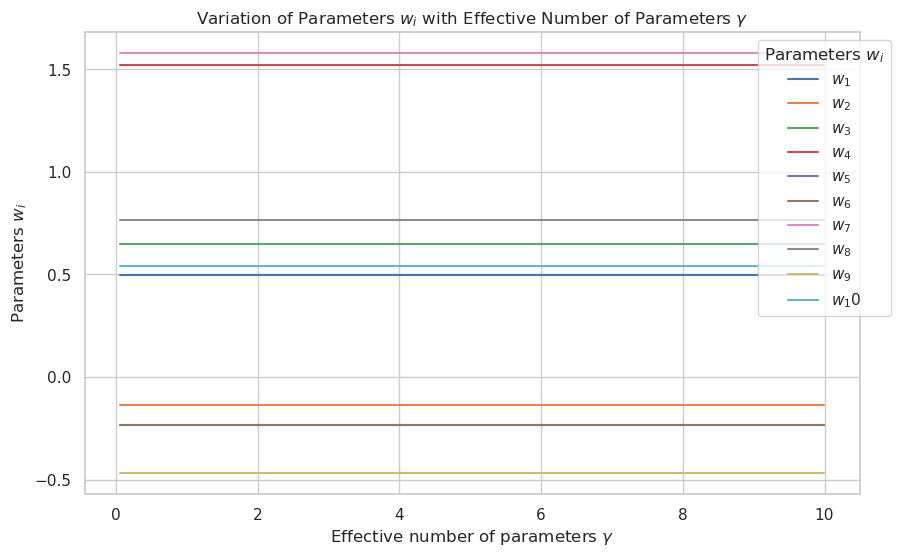

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate the model with 10 parameters w_i
M = 10  # Number of parameters
np.random.seed(42)

# Generate random weights (w_i)
w = np.random.randn(M)

# Define a function for the effective number of parameters gamma based on alpha
def calculate_gamma(alpha, lambdas):
    """ Calculate the effective number of parameters γ for a given alpha and eigenvalues λi """
    return np.sum(lambdas / (lambdas + alpha))

# Simulate eigenvalues (λi) for the Gaussian basis functions
lambdas = np.linspace(1, 10, M)  # Example eigenvalues, these can be derived from the model

# Vary alpha in a reasonable range
alpha_values = np.logspace(-3, 3, 100)  # Logarithmic scale for alpha
gamma_values = [calculate_gamma(alpha, lambdas) for alpha in alpha_values]

# Plot the parameters w_i vs. effective number of parameters gamma
plt.figure(figsize=(10, 6))

# Plot the individual parameters w_i as alpha varies
for i in range(M):
    plt.plot(gamma_values, w[i] * np.ones_like(gamma_values), label=f'$w_{i+1}$')

plt.xlabel('Effective number of parameters $\\gamma$')
plt.ylabel('Parameters $w_i$')
plt.title('Variation of Parameters $w_i$ with Effective Number of Parameters $\\gamma$')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), title="Parameters $w_i$")
plt.grid(True)
plt.show()


## Limitations of Fixed Basis Functions

Throughout this chapter, we have focused on models comprising a linear combination of fixed, nonlinear basis functions. We have seen that the assumption of linearity in the parameters led to a range of useful properties, including closed-form solutions to the least-squares problem, as well as a tractable Bayesian treatment. Furthermore, for a suitable choice of basis functions, we can model arbitrary nonlinearities in the mapping from input variables to targets.

In the next chapter, we shall study an analogous class of models for classification. It might appear, therefore, that such linear models constitute a general-purpose framework for solving problems in pattern recognition. Unfortunately, there are some significant shortcomings with linear models, which will cause us to turn in later chapters to more complex models such as support vector machines and neural networks.

The difficulty stems from the assumption that the basis functions $ \varphi_j(x) \) are fixed before the training data set is observed, and is a manifestation of the curse of dimensionality discussed in Section 1.4. As a consequence, the number of basis functions needs to grow rapidly, often exponentially, with the dimensionality \( D \) of the input space.

Fortunately, there are two properties of real data sets that we can exploit to help alleviate this problem. 

### First Property: Data Lies Close to a Nonlinear Manifold
The data vectors $ \{x_n\} $ typically lie close to a nonlinear manifold whose intrinsic dimensionality is smaller than that of the input space, as a result of strong correlations between the input variables. We will see an example of this when we consider images of handwritten digits in Chapter 12.

If we are using localized basis functions, we can arrange that they are scattered in input space only in regions containing data. This approach is used in radial basis function networks and also in support vector and relevance vector machines.

### Second Property: Target Variables Depend on a Small Number of Directions
Target variables may have significant dependence on only a small number of possible directions within the data manifold. Neural networks can exploit this property by choosing the directions in input space to which the basis functions respond.
